In [1]:
import glob
import os
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from classes import *

data_dir = "/Users/hunterholland/Documents/Research/Laidlaw/Data/Modified"

#### Denoting Sample Files

In [2]:
spitzer_sample = None
chandra_sample = f"{data_dir}/L1517/Chandra/primary/acisf03755N004_evt2.fits"
xmm_sample = f"{data_dir}/L1517/XMM/PPS/P0101440801M1S001MIEVLI0000.FTZ"
rosat_sample = f"{data_dir}/L1517/ROSAT/rp201278a01_bas.fits"
swift_sample = f"{data_dir}/L1517/Swift/xrt/event/sw00034249004xpcw3po_cl.evt.gz"

#### Listing Instrument Event Files

In [3]:
# Spitzer


# Chandra
evt2 = glob.glob(f"{data_dir}/**/Chandra/**/*evt2.fits", recursive=True)

# XMM
mos_1 = glob.glob(f"{data_dir}/**/XMM/PPS/evt/*M1*MIEVLI*.FTZ", recursive=True)
mos_2 = glob.glob(f"{data_dir}/**/XMM/PPS/evt/*M2*MIEVLI*.FTZ", recursive=True)
pn = glob.glob(f"{data_dir}/**/XMM/PPS/evt/*PN*PIEVLI*.FTZ", recursive=True)

# Rosat
basics = glob.glob(f"{data_dir}/**/ROSAT/*_bas*", recursive=True)

# Swift
cleaned_event = glob.glob(f"{data_dir}/**/Swift/xrt/event/sw*po_cl.evt.gz", recursive=True)

Chandra data initiated.


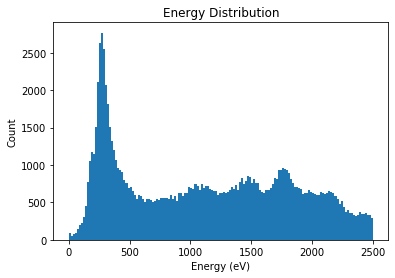

Data filtered into file evt2_f3.fits


In [25]:
# for file in evt2:
#     chandra_object = Chandra(file)
#     chandra_object.e_mask([300])

chandra = Chandra(evt2[-1])
chandra.e_hist([0, 2500], nbins=150)
chandra.e_mask([0, 1000], newfile=True, filename="evt2_f3.fits")

# Spitzer
## Make Energy Histogram

# Chandra
## Make Energy Histogram

In [ ]:
obj_name = "L1521E"
filepath = chandra_sample
min_e = 6000
max_e = 10000
nbins = 75

evt_data = fits.getdata(filepath)
energy = evt_data["energy"]
min_thresh = evt_data["energy"] >= min_e
max_thresh = evt_data["energy"] < max_e
plt.hist(energy[min_thresh & max_thresh], bins=nbins)
plt.title(f"{obj_name} Energy Distribution")
plt.xlabel("Energy (eV)")
plt.ylabel("Count")
plt.show()

In [ ]:
# Save as PNG #
plt.hist(e_band, bins=nbins)
plt.title(f"{obj_name} Energy Distribution: {min_e}-{max_e} eV")
plt.xlabel("Energy (eV)")
plt.ylabel("Count")
plt.savefig(f"{obj_name}_ehist_{min_e}-{max_e}.png", dpi=250, format="png")
plt.close()

# XMM-Newton
#### Notes for Data Filtering
Images may have all sorts of defects: in one example, the edges of all 12 individual detector chips light up and there are all sorts of funny 'streaks' and splotches. All of these are either electronic noise generated signals that masquerade as photons, or cosmic rays (high energy charged particles that pervade all of space, they fly through the detector and create ionization, some fraction of which shows up as fake photons). One (we) can eventually get rid of a lot of that stuff,_if we want to, by a series of 'culls' on the list of photons (we leave out the very lowest photon energies; many electronic noise events show up as very low photon energy fake photons, likewise the highest photon energies (a lot of cosmic rays show up as high energy fake photons);we can look at a time-series of the total count rate in the detectors and eliminate time intervals with increased 'background flaring', etc.)._
## Make Energy Histogram

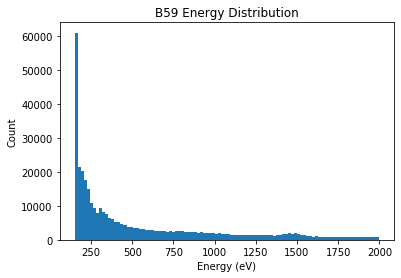

In [59]:
obj_name = "B59"
filepath = xmm_sample
min_e = 0
max_e = 2000
nbins = 100

# from XMM_functions.make_hist
evt_data = fits.getdata(filepath)
energy = evt_data["PI"]
min_thresh = evt_data["PI"] >= min_e
max_thresh = evt_data["PI"] < max_e
plt.hist(energy[min_thresh & max_thresh], bins=nbins)
plt.title(
    f"{obj_name} Energy Distribution")
plt.xlabel("Energy (eV)")
plt.ylabel("Count")
plt.show()

In [ ]:
# Save as PNG #
plt.hist(e_band, bins=nbins)
plt.title(
    f"{obj_name} Energy Distribution: {min_e}-{max_e} eV")
plt.xlabel("Energy (eV)")
plt.ylabel("Count")
plt.savefig(f"{obj_name}_ehist_{min_e}-{max_e}.png", dpi=250, format="png")
plt.close()